In [1]:
# Imports
import os

import matplotlib.pyplot as plt
# numpy, matplotlib, seaborn
import numpy as np
# pandas
import pandas as pd
import seaborn as sns
from pandas import DataFrame

sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
# Get the path of the current notebook execution folder
current_folder = os.getcwd()

# Path of "input/test" folder in the same current folder
folder_path = os.path.join(current_folder, "input")

# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv(os.path.join(folder_path, "train.csv"))
test_df = pd.read_csv(os.path.join(folder_path, "test.csv"))

In [3]:
# preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(titanic_df.info())
print("----------------------------")
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418

In [5]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test_df = test_df.drop(['Name', 'Ticket'], axis=1)

D:\Documentos\GitHub\Proyecto_CicloDeVida_UEM_TRAIN\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


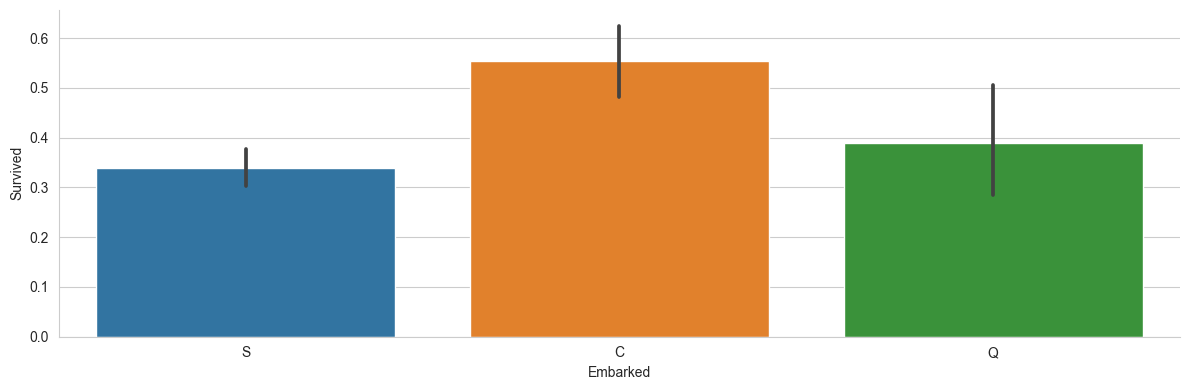

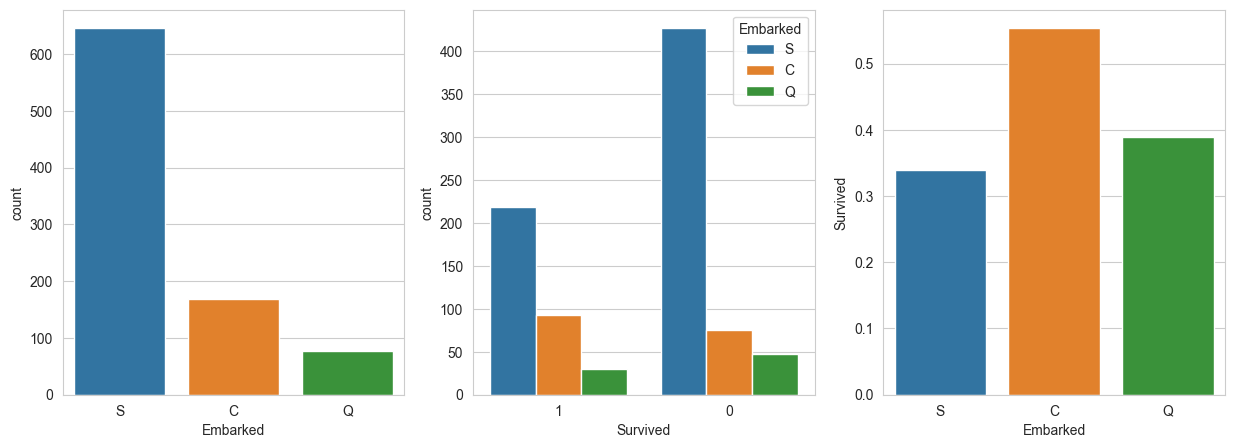

In [6]:
# Embarked

# only in titanic_df, fill the two missing values with the most occurred value, which is "S".
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

# plot
sns.catplot(x='Embarked', y='Survived', data=titanic_df, height=4, aspect=3, kind='bar')

fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x='Embarked', data=titanic_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[1, 0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc, order=['S', 'C', 'Q'], ax=axis3)

# Either to consider Embarked column in predictions,
# and remove "S" dummy variable,
# and leave "C" & "Q", since they seem to have a good rate for Survival.

# OR, don't create dummy variables for Embarked column, just drop it,
# because logically, Embarked doesn't seem to be useful in prediction.

embark_dummies_titanic = pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

titanic_df = titanic_df.join(embark_dummies_titanic)
test_df = test_df.join(embark_dummies_test)

titanic_df.drop(['Embarked'], axis=1, inplace=True)
test_df.drop(['Embarked'], axis=1, inplace=True)

<Axes: xlabel='Survived'>

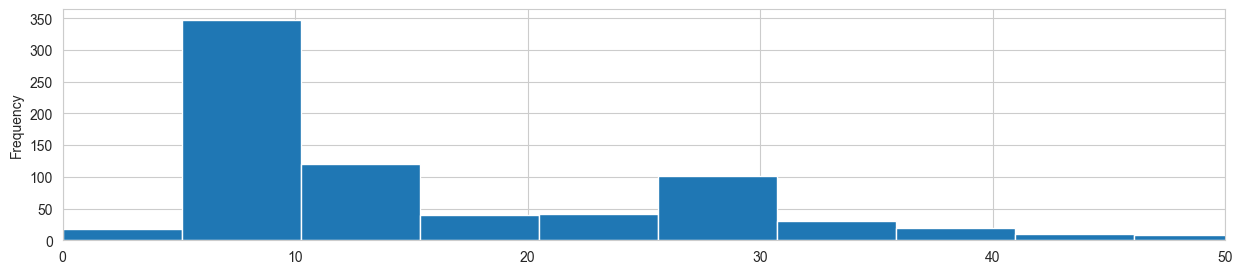

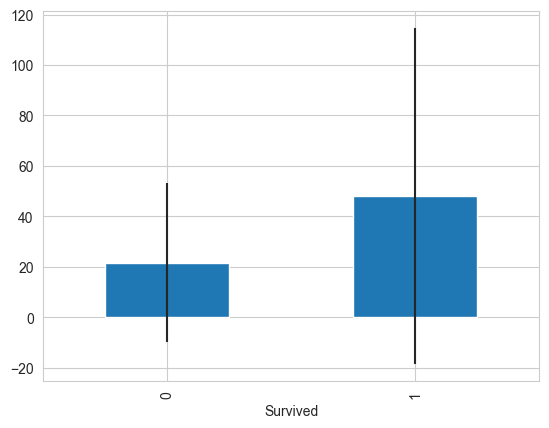

In [7]:
# Fare
# only for test_df, since there is a missing "Fare" values
test_df["Fare"].fillna(test_df["Fare"].mean(), inplace=True)

# convert from float to int
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test_df['Fare'] = test_df['Fare'].astype(int)

# get fare for survived & didn't survive passengers 
fare_not_survived = titanic_df["Fare"][titanic_df["Survived"] == 0]
fare_survived = titanic_df["Fare"][titanic_df["Survived"] == 1]

# get average and std for fare of survived/not survived passengers
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = DataFrame([fare_not_survived.std(), fare_survived.std()])

# plot
titanic_df['Fare'].plot(kind='hist', figsize=(15, 3), bins=100, xlim=(0, 50))

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare, kind='bar', legend=False)

In [8]:
# Cabin
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction in this simple model
titanic_df.drop("Cabin", axis=1, inplace=True)
test_df.drop("Cabin", axis=1, inplace=True)

In [9]:
# Age 
# get average, std, and number of NaN values in titanic_df
average_age_titanic = titanic_df["Age"].mean()
std_age_titanic = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test = test_df["Age"].mean()
std_age_test = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic,
                           size=count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size=count_nan_age_test)

# drop all null values, and convert to int
titanic_df['Age'].dropna().astype(int)
# test_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

# convert from float to int
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15408\2818187047.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
C:\Users\Usuario\AppData\Local\Temp\ipykernel_15408\2818187047.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["Age"][np.isnan(test_df["Age"])] = rand_2


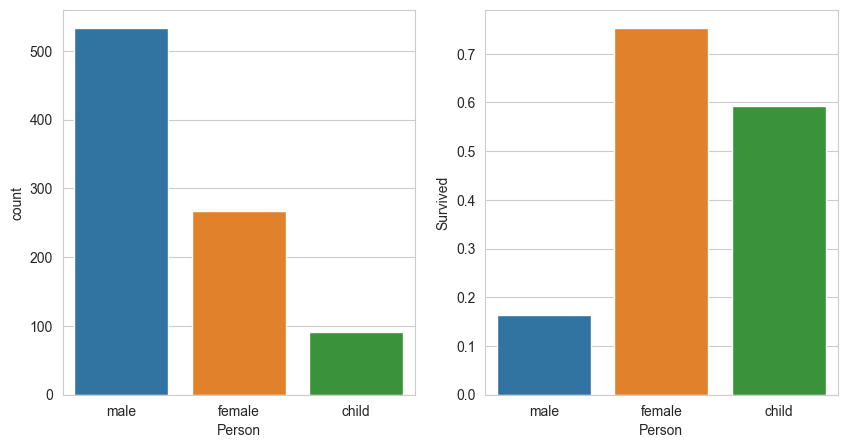

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    age, sex = passenger
    return 'child' if age < 16 else sex


titanic_df['Person'] = titanic_df[['Age', 'Sex']].apply(get_person, axis=1)
test_df['Person'] = test_df[['Age', 'Sex']].apply(get_person, axis=1)

# No need to use Sex column since we created Person column
titanic_df.drop(['Sex'], axis=1, inplace=True)
test_df.drop(['Sex'], axis=1, inplace=True)

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic = pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.columns = ['Child', 'Female', 'Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Child', 'Female', 'Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

titanic_df = titanic_df.join(person_dummies_titanic)
test_df = test_df.join(person_dummies_test)

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(x='Person', data=titanic_df, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = titanic_df[["Person", "Survived"]].groupby(['Person'], as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male', 'female', 'child'])

titanic_df.drop(['Person'], axis=1, inplace=True)
test_df.drop(['Person'], axis=1, inplace=True)

In [11]:
# define training and testing sets

X_train = titanic_df.drop("Survived", axis=1)
Y_train = titanic_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()

In [12]:
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

D:\Documentos\GitHub\Proyecto_CicloDeVida_UEM_TRAIN\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8226711560044894

In [13]:
#Support Vector Machines

svc = SVC()

svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

svc.score(X_train, Y_train)

0.6812570145903479

In [14]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100, oob_score=True, max_features=5)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.9663299663299664

In [15]:
random_forest.get_params, random_forest.feature_importances_

(<bound method BaseEstimator.get_params of RandomForestClassifier(max_features=5, oob_score=True)>,
 array([0.10395205, 0.28840566, 0.06084188, 0.03277389, 0.1976836 ,
        0.02366798, 0.01751243, 0.03151722, 0.24364528]))

In [16]:
# Gradient Boosts
grad_boost = GradientBoostingClassifier(n_estimators=1000)
grad_boost.fit(X_train, Y_train)
Y_pred = grad_boost.predict(X_test)
grad_boost.score(X_train, Y_train)

0.9539842873176206

In [17]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(titanic_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

# preview
coeff_df

,Features,Coefficient Estimate
0,Pclass,-0.985916
1,Age,-0.023177
2,SibSp,-0.410953
3,Parch,-0.188284
4,Fare,0.002888
5,C,0.426890
6,Q,0.237739
7,Child,2.493027
8,Female,2.944916


In [18]:
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": Y_pred
})
submission.to_csv('titanic.csv', index=False)